## Import Libraries

In [1]:
%matplotlib inline

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helper import preprocess, get_sign_name

np.random.seed(42)

Using TensorFlow backend.


## Load Data

In [2]:



training_file = 'data/train.p'
valid_file = 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(valid_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## Summary of dataset

In [3]:
# Number of training example
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Image of each traffic sign

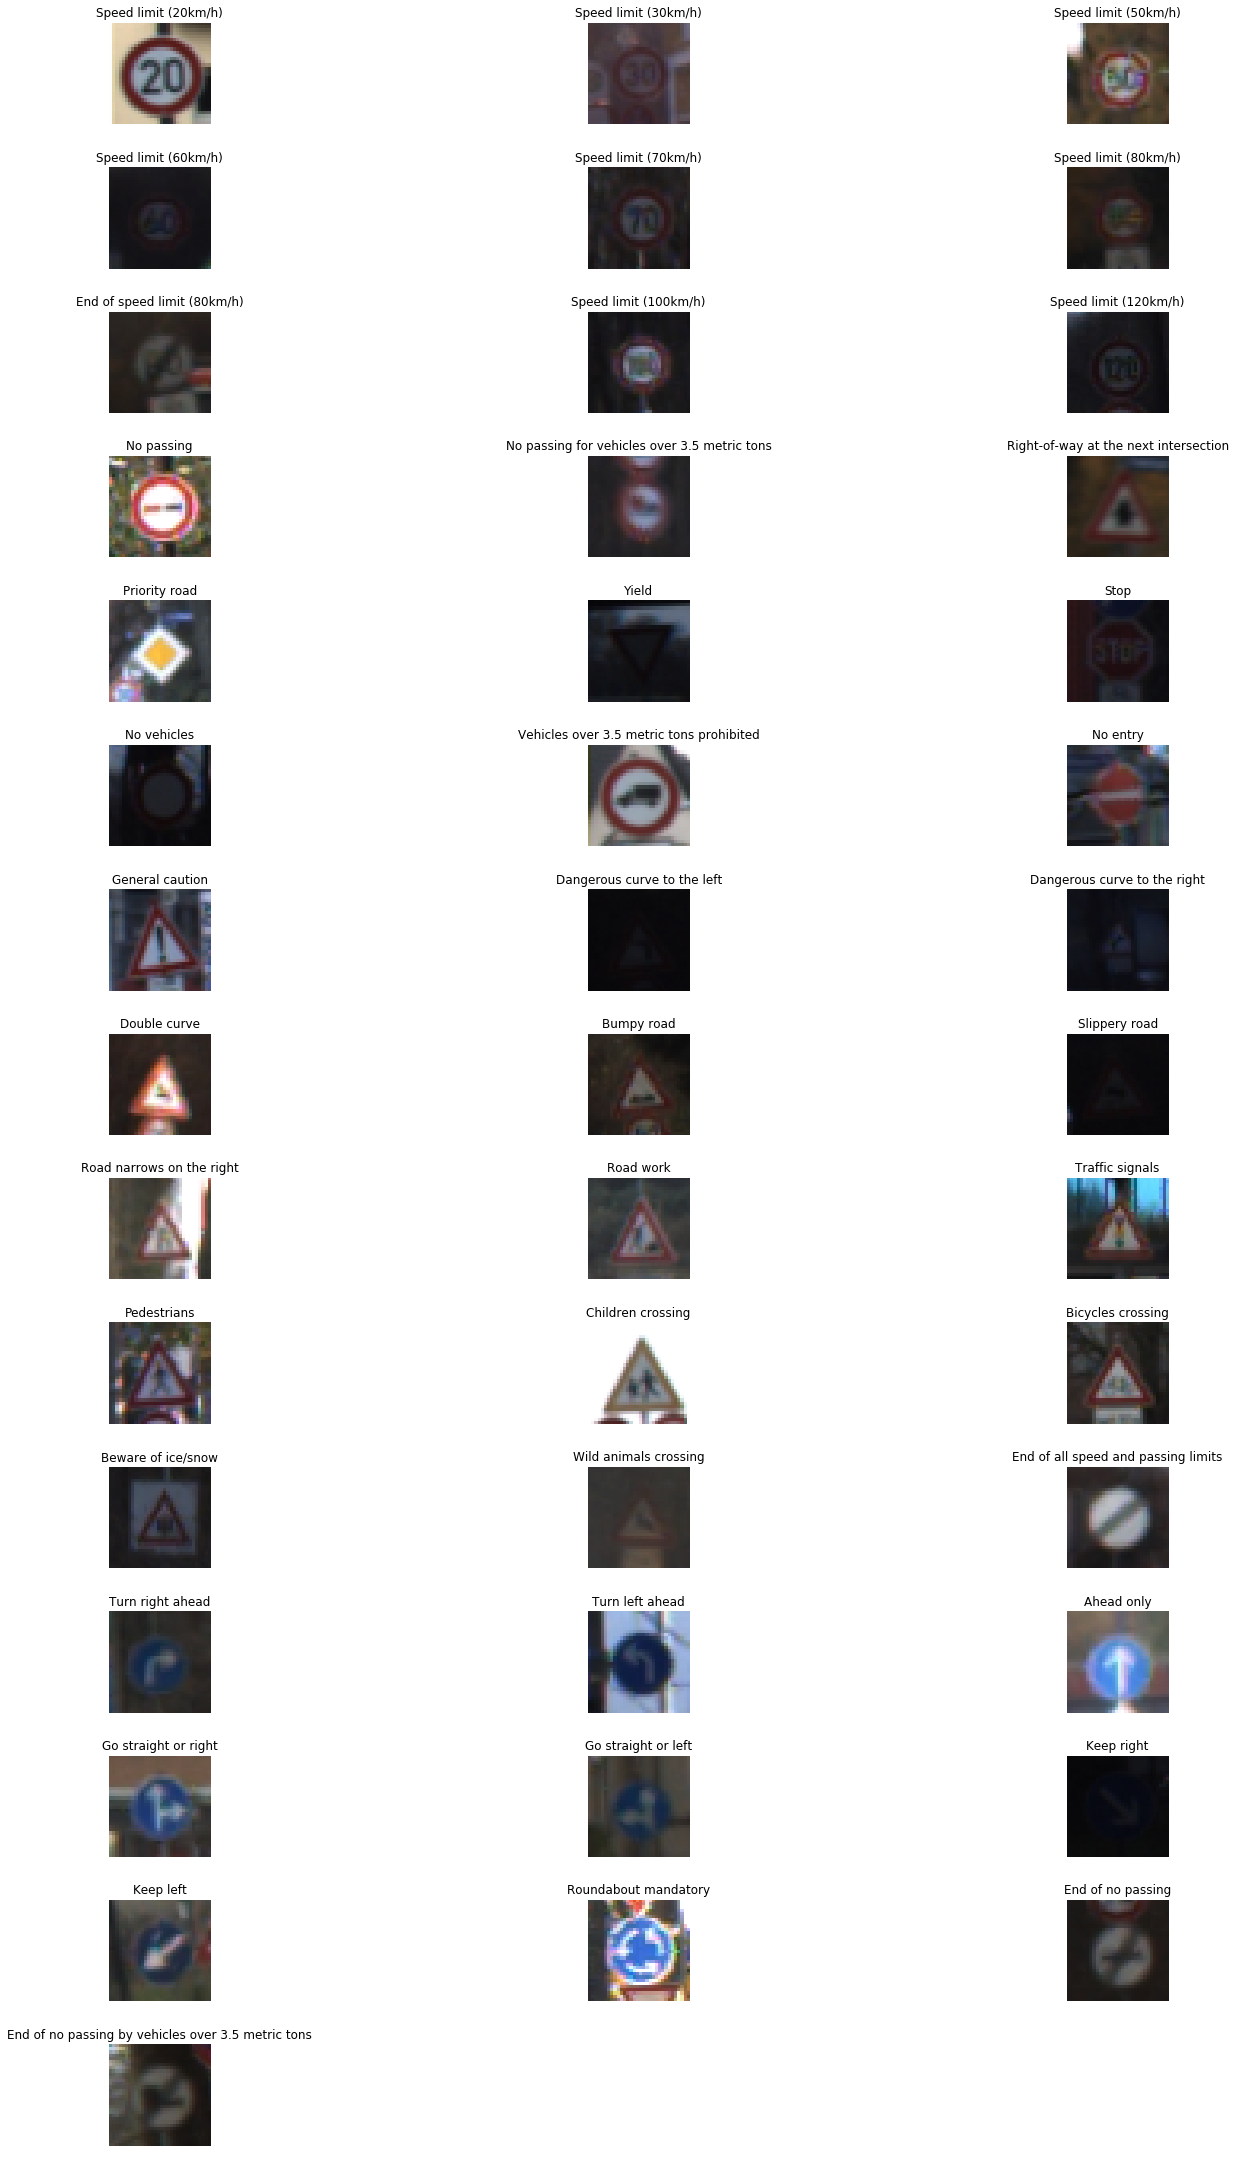

In [4]:
label_indx_map = {}

for idx, label in enumerate(y_train):
    if label not in label_indx_map:
        label_indx_map[label] = idx
        
### Printing example of each kind

signs = pd.read_csv("data/signnames.csv")
def get_sign_name(class_id):
    return signs[signs['ClassId'] == class_id]['SignName'].tolist()[0]

plt.figure(figsize=(20,30))
for idx, key in enumerate(label_indx_map):
    sign_name = get_sign_name(key)
    plt.subplot(15, 3, idx+1)
    plt.imshow(X_train[label_indx_map[key]])
    plt.title(sign_name)
    plt.axis('off')
plt.tight_layout(pad=0.2, w_pad=0.1, h_pad=1.0)